# 01. Introduction to TSP

The main goal of this notebook is to familiarize you with the Travelling Salesman Problem. 
For now, we will use only classical algorithms, we will go into the quantum ones later on, so if you are familiar with the TSP problem, you can skip to (TODO: link).

## What is TSP problem?

TSP (short for Travelling Salesman Problem) is one of the most well-known optimization problems. Imagine the following situation: you are a travelling salesman and you have a plan to visit some 15 cities. You want to visit every city exactly once and return to your starting point and you wonder in what order do you need to do that in order to have the shortest possible route.

This is the Travelling Salesman Problem. It can come in many variations:
- you may want to take into account not the distances between the cities, but cost or time it takes to travel between them.
- you may want to specify other final city, or not specify any at all.
- the distances between the cities might not be symmetrical - distance A -> B is different than B -> A (e.g. due to roadblocks).

For the rest of this tutorial we will deal with the following version (unless stated otherwise): we want to minize covered distance, which are symmetrical and we don't care about what is the last city.

Looking at it mathematically, you have the following elements here:
- representation of the problem - usually it's either graph: each node represents a city and each edge the distance between two cities, or a distance matrix - a matrix, where row and column represents a city and each entry is a distance.
- cost function - what we want to minimize - in our case it's the sum of the distances.
- answer - how do we encode our result? For example, we may want to have a list: [B, C, A, D].

TSP is a NP-hard combinatorial graph problem:
- NP-hard - it can't be solved in the polynomial time and it's easy to evaluate given solution.
- Combinatorial, since your answer is a subset from the set of discrete elements (cities).
- Graph - your map can be represented as a graph.

This is an important problem, since 
TODO: Not sure if it's worth explaining.

## Let's code! - 4 cities

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def create_cities(N):
    """
    Creates an array of random points of size N.
    """
    cities = []
    for i in range(N):
        cities.append(np.random.rand(2) * 10)
    return np.array(cities)

Ok, so let's start with simple 4 cities example.
Since the points are generated by random, if you don't like your setup, just run the cell again.

In [13]:
cities = create_cities(4)

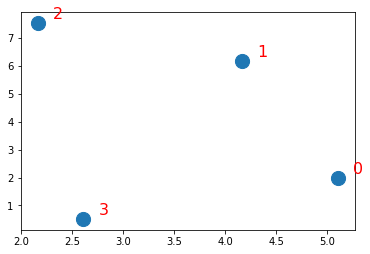

In [32]:
#TODO: hide plotting to some script
def plot_cities(cities):
    plt.scatter(cities[:, 0], cities[:, 1], s=200)
    for i, city in enumerate(cities):
        plt.annotate(i, (city[0] + 0.15, city[1] + 0.15), size=16, color='r')

plot_cities(cities)

Ok, so we have our cities, so now we can solve the TSP problem!

But before we start, let's prepare some helpers.
Since representing our problem as a distance matrix is very handy, we need a function that will generate a distance matrix out of our list of cities.
We also defined distance as the euclidean distance between the points.

In [16]:
# TODO: We may want to hide the logic and show people only functions solving it?
import itertools

def distance_between_points(point_A, point_B):
    return np.sqrt((point_A[0] - point_B[0])**2 + (point_A[1] - point_B[1])**2)

def get_distance_matrix(cities):
    number_of_cities = len(cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            matrix[i][j] = distance_between_points(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
    return matrix

So let's take a look at the distance matrix we have

In [19]:
distance_matrix = get_distance_matrix(cities)
print(distance_matrix)

[[0.         4.30400452 6.28574683 2.89444293]
 [4.30400452 0.         2.41419518 5.87338024]
 [6.28574683 2.41419518 0.         7.03450079]
 [2.89444293 5.87338024 7.03450079 0.        ]]


As you can see, it's symmetric and have 0s on the diagonal - it's pretty reasonable, since the distance between city A and city A is 0.

Now we are ready to finaly find the shortest route!

In [50]:
def calculate_cost(cost_matrix, solution):
    cost = 0
    # I added this -1, since we don't care about returning to the starting point
    for i in range(len(solution) - 1):
        a = i%len(solution)
        b = (i+1)%len(solution)
        cost += cost_matrix[solution[a]][solution[b]]

    return cost

def solve_tsp_brute_force(cities, starting_city, verbose=True):
    number_of_cities = len(cities)
    initial_order = range(number_of_cities)
    cost_matrix = get_distance_matrix(cities)
    
    # We create all the possible routes
    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permutation = all_permutations[0]
    best_cost = calculate_cost(cost_matrix, best_permutation)*1000
    
    # We iterate through all the permutations and calculate their cost
    for permutation in all_permutations:
        if permutation[0] != starting_city:
            continue
        current_cost = calculate_cost(cost_matrix, permutation)
        if current_cost < best_cost:
            best_permutation = permutation
            best_cost = current_cost
    if verbose:
        print("Best route:", best_permutation)
        print("Cost:", best_cost)
    return best_permutation

In [31]:
solution = solve_tsp_brute_force(cities, 0)

Best route: [0, 3, 1, 2]
Cost: 11.182018355248086


Ok, so now we can plot our solution!

In [37]:
def plot_solution(cities, solution):
    plot_cities(cities)
    
    plt.xlim([min(cities[:, 0]) - 1, max(cities[:, 0]) + 1])
    plt.ylim([min(cities[:, 1]) - 1, max(cities[:, 1]) + 1])
    for i in range(len(solution) - 1):
        a = i%len(solution)
        b = (i+1)%len(solution)
        A = solution[a]
        B = solution[b]
        plt.plot([cities[A, 0], cities[B, 0]], [cities[A, 1], cities[B, 1]], c='r')

    cost = calculate_cost(get_distance_matrix(cities), solution)
    title_string = "Cost:" + str(cost)
    title_string += "\n" + str(solution)
    plt.title(title_string)


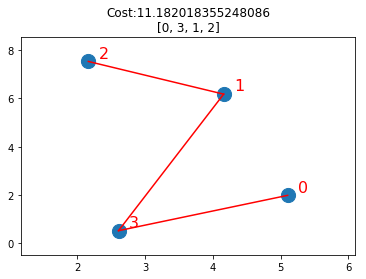

In [38]:
plot_solution(cities, solution)

## Let's try something harder

Ok, we have created some functions that do all the heavy lifting for us.
Now it's time to try some harder problems - let's start with 6 cities.

Best route: [0, 5, 3, 2, 4, 1]
Cost: 16.373725129319322


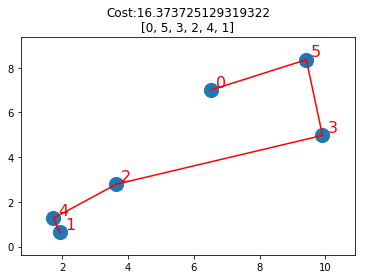

In [45]:
cities_6 = create_cities(6)
solution = solve_tsp_brute_force(cities_6, 0)
plot_solution(cities_6, solution)

And try even more:

Best route: [0, 5, 3, 8, 1, 6, 4, 7, 2, 9]
Cost: 20.49583625826463


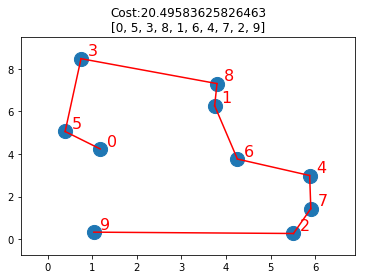

In [46]:
cities_10 = create_cities(10)
solution = solve_tsp_brute_force(cities_10, 0)
plot_solution(cities_10, solution)

#TODO: bigger font in the whole notebook?
You probably noticed, that this one took much longer to find the best route.
Let's find out how much longer.

In [60]:
for i in range(4, 10):
    print(i, "cities")
    %time solution = solve_tsp_brute_force(create_cities(i), 0, verbose=False)

4 cities
CPU times: user 343 µs, sys: 120 µs, total: 463 µs
Wall time: 391 µs
5 cities
CPU times: user 742 µs, sys: 499 µs, total: 1.24 ms
Wall time: 813 µs
6 cities
CPU times: user 1.43 ms, sys: 153 µs, total: 1.58 ms
Wall time: 1.54 ms
7 cities
CPU times: user 7.81 ms, sys: 1.29 ms, total: 9.09 ms
Wall time: 8.07 ms
8 cities
CPU times: user 50.1 ms, sys: 2.49 ms, total: 52.6 ms
Wall time: 52.4 ms
9 cities
CPU times: user 629 ms, sys: 45.3 ms, total: 674 ms
Wall time: 681 ms


You might say - "These numbers don't mean anything - these are randomly generated graphs, we might have been unlucky." 

Ok, so let's be a little bit more methodical about it.
%timeit method runs given method many times and takes the average computing time.
Don't be surprised if it takes you some time to run it.

3 cities
89.2 µs ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4 cities
108 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 cities
213 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 cities
843 µs ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7 cities
5.2 ms ± 457 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8 cities
38.5 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


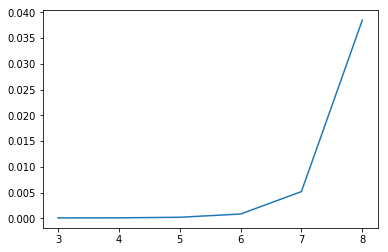

In [76]:
calculation_times = []
city_sizes = range(3, 9)

for i in city_sizes:
    print(i, "cities")
    calc_time = %timeit -o -n 100 solve_tsp_brute_force(create_cities(i), 0, verbose=False) 
    calculation_times.append(calc_time.average)

plt.plot(list(city_sizes), calculation_times)

It looks like a nasty exponential curve. But it's actually not a huge surprise since we used a brute force approach. 

Let's try something more reasonable.

## Practical applications

## Additional sources

- https://en.wikipedia.org/wiki/Travelling_salesman_problem